In [1]:
!pip install PyICU
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 305 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for PyICU: filename=PyICU-2.9-cp37-cp37m-linux_x86_64.whl size=1375693 sha256=09446aca1680627b92c1d16d8afff6b95e6a78b98ea83622747025205e4bfe14
  Stored in directory: /root/.cache/pip/wheels/28/88/93/6c1b06361e4cbd4e7f793fb456729f69798f9aa3fc2a791cd7
Successfully built PyICU
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.4 MB/s 
     |████████████████████████████████| 965 kB 54.2 MB/s 
     |████████████████████████████████| 581 kB 64.9 MB/s 
     |████████████████████████████████| 235 kB 64.0 MB/s 


In [2]:
import underthesea
import pandas as pd
import icu
import numpy as np
import os 
import pickle
import re
import gensim
from underthesea import word_tokenize #underthesea tách tốt hơn pyvi,ex:
# s2 = "con ngựa đá đá con ngựa đá"
# underthesea: ['con', 'ngựa', 'đá', 'đá', 'con', 'ngựa', 'đá']
# pyvi: 'con ngựa đá đá con ngựa đá

# s3 = "cô bé bế con bé"
# underthesea: ['cô', 'bé', 'bế', 'con bé']
# pyvi: cô bé bế con bé
# !pip install pyvi

In [3]:
# from pyvi import ViTokenizer
# from underthesea import word_tokenize
# a = "học sinh học môn sinh học"
# print(pyvi.ViTokenizer.tokenize(a))
# print(word_tokenize(a))

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Read data & stop word

In [5]:
data = pd.read_csv("/content/drive/MyDrive/NLP/data.csv")
# pd.DataFrame(sorted(df, key=len), columns=['data'])[5000:].reset_index(drop=True).to_csv("/content/drive/MyDrive/NLP/dff.csv", encoding='utf-8')

In [6]:
stop_word = []
with open("/content/drive/MyDrive/NLP/stop_word.txt") as f:
  for line in f:
    stop_word.append(line.strip())
len(stop_word)

1942

In [7]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop =True)
data.head()


,data
0,"Về phần bồi thường, nhóm muốn Apple trả chi ph..."
1,Một giải pháp thay thế là áp dụng tín hiệu - ...
2,"Tuy nhiên, không thể phủ nhận thông điệp từ c..."
3,"Theo thỏa thuận, Cook sẽ nhận 5 triệu cổ phiếu..."
4,"Tôi cũng có thể"""


In [8]:
def preprocess_paragraph(data):
  lines = ""
  for line in data:
    lines += line+" "
  temp = re.findall("[^\d\s]\w+", lines.lower())
  vals = " ".join(re.findall("\w+[^\d\s]", " ".join(temp)))
  # print(temp)
  return vals


In [9]:
def preprocess_line_to_df(data):
  df = []
  for line in data:
    temp = re.findall("[^\d\s]\w+", line.lower())
    vals = " ".join(re.findall("\w+[^\d\s]", " ".join(temp)))
    df.append(vals)
  return df

In [10]:
# preprocess_line_to_df(data.data)
df = pd.read_csv("/content/drive/MyDrive/NLP/dff.csv", index_col = 0)
df = pd.DataFrame(preprocess_line_to_df(df.data), columns=['data'])
df.dropna(inplace=True)
df.reset_index(inplace=True, drop =True)
len(df)

42061

In [11]:
paragraph = preprocess_paragraph(df.data[:10])
paragraph

'cả hai có lịch sử đối đầu hơn năm qua tôi chỉ muốn dạy một đứa trẻ đánh máy michael saylor cũng là tỷ phú bitcoin địa điểm yêu thích công viên quốc gia nhiều mẫu thậm chí đã vượt xa cột mốc thu ngân sách cả năm đạt dự toán tăng những kiểu lừa đảo này ngày một nhiều công ty nào không tuân thủ sẽ bị phạt tại sao có những kẻ muốn làm điều này mức giá tham khảo của máy dao động từ'

In [12]:
# def smooth_data(X):
#   smooth = []
#   lines = ""
#   for line in X:
#     lines += line #nối các phần tử trong file txt với nhau bằng ' '
#   lines = gensim.utils.simple_preprocess(lines) # bỏ các dấu câu và số không cần thiết
#   return lines
# a = smooth_data(data.data[:10])

#2. Make dictionary

In [13]:
import re
import icu
def make_dictionary_me(paragraph):
  dic = {}
  collator = icu.Collator.createInstance(icu.Locale('de_DE.UTF-8'))
  vals = sorted(set(word_tokenize(paragraph)), key=collator.getSortKey)
  for val, key in  enumerate(vals):
    dic[key]=val
  return dic

In [14]:
dictionary = make_dictionary_me(paragraph)
dictionary


{'bitcoin': 1,
 'bị': 0,
 'chỉ': 3,
 'có': 4,
 'công ty': 5,
 'công viên': 6,
 'cũng': 9,
 'cả': 2,
 'cột': 7,
 'của': 8,
 'dao động': 12,
 'dạy': 14,
 'dự toán': 18,
 'giá': 20,
 'hai': 21,
 'hơn': 22,
 'không': 24,
 'kiểu': 25,
 'kẻ': 23,
 'là': 26,
 'làm': 27,
 'lịch sử': 28,
 'lừa đảo': 29,
 'michael': 32,
 'muốn': 36,
 'máy': 31,
 'mẫu': 30,
 'mốc': 33,
 'một': 34,
 'mức': 35,
 'ngày một': 41,
 'ngân sách': 40,
 'nhiều': 42,
 'những': 43,
 'nào': 38,
 'này': 39,
 'năm': 37,
 'phạt': 44,
 'qua': 45,
 'quốc gia': 46,
 'saylor': 47,
 'sẽ': 48,
 'tham khảo': 52,
 'thu': 53,
 'thậm chí': 51,
 'trẻ': 55,
 'tuân thủ': 57,
 'tôi': 54,
 'tăng': 50,
 'tại sao': 49,
 'từ': 56,
 'tỷ phú': 58,
 'vượt': 59,
 'xa': 60,
 'yêu thích': 61,
 'điều': 16,
 'đánh máy': 11,
 'đã': 10,
 'đạt': 13,
 'địa điểm': 15,
 'đối đầu': 17,
 'đứa': 19}

#3. Embedding sentence by index

In [15]:
data_test = word_tokenize(paragraph)
data_test

['cả',
 'hai',
 'có',
 'lịch sử',
 'đối đầu',
 'hơn',
 'năm',
 'qua',
 'tôi',
 'chỉ',
 'muốn',
 'dạy',
 'một',
 'đứa',
 'trẻ',
 'đánh máy',
 'michael',
 'saylor',
 'cũng',
 'là',
 'tỷ phú',
 'bitcoin',
 'địa điểm',
 'yêu thích',
 'công viên',
 'quốc gia',
 'nhiều',
 'mẫu',
 'thậm chí',
 'đã',
 'vượt',
 'xa',
 'cột',
 'mốc',
 'thu',
 'ngân sách',
 'cả',
 'năm',
 'đạt',
 'dự toán',
 'tăng',
 'những',
 'kiểu',
 'lừa đảo',
 'này',
 'ngày một',
 'nhiều',
 'công ty',
 'nào',
 'không',
 'tuân thủ',
 'sẽ',
 'bị',
 'phạt',
 'tại sao',
 'có',
 'những',
 'kẻ',
 'muốn',
 'làm',
 'điều',
 'này',
 'mức',
 'giá',
 'tham khảo',
 'của',
 'máy',
 'dao động',
 'từ']

In [16]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# lst_len = [len(i) for i in data_test]
# Counter(lst_len)

In [17]:
import pandas as  pd
# tạo dictionary chữ sang onehot
# onehot_encode = pd.get_dummies(dictionary.keys())
# onehot_dict = {}
# for index, label in enumerate(onehot_encode.columns):
#   onehot_dict[label] = list(onehot_encode.iloc[index])
# onehot_encode

In [18]:
# mã hóa toàn bộ các câu trong văn bản thành index
wids = [dictionary[w] for w in  data_test]
diction_size = len(dictionary)
diction_size
wids

[2,
 21,
 4,
 28,
 17,
 22,
 37,
 45,
 54,
 3,
 36,
 14,
 34,
 19,
 55,
 11,
 32,
 47,
 9,
 26,
 58,
 1,
 15,
 61,
 6,
 46,
 42,
 30,
 51,
 10,
 59,
 60,
 7,
 33,
 53,
 40,
 2,
 37,
 13,
 18,
 50,
 43,
 25,
 29,
 39,
 41,
 42,
 5,
 38,
 24,
 57,
 48,
 0,
 44,
 49,
 4,
 43,
 23,
 36,
 27,
 16,
 39,
 35,
 20,
 52,
 8,
 31,
 12,
 56]

#4. Create sample include context and target

In [19]:
window_size = 2
def generate_sample(seq, window_size = 2):
  context_word = []
  target = []
  # for seq in data:
  for i in range(window_size, len(seq) -  window_size):
    begin = i - window_size
    end = i +  window_size + 1
    context_word.append([seq[j] for j in range(begin, end) if j != i])
    target.append(seq[i])
  return context_word, target

In [20]:
context_word, target = generate_sample(data_test, 2)
context_word[0]


['cả', 'hai', 'lịch sử', 'đối đầu']

In [21]:
vocab_size = len(dictionary)
context_size = len(context_word)
print(vocab_size)
print(context_size)

62
65


#5. Built the Model

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import urllib.request
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances


class CBOW(nn.Module):
  def __init__(self, vocab_size, embedding_dim, context_size):
    super(CBOW, self).__init__()
    self.embeddings = nn.Embedding(vocab_size, embedding_dim)
    self.linear1 = nn.Linear(2*context_size*embedding_dim, 128) #2*context_size * embedding_dim
    self.linear2 = nn.Linear(128, vocab_size)

  def forward(self, inputs):
    embeds = self.embeddings(inputs).view((1, -1)) #embedding input, đưa input về shape(1, -1)
    out1 = F.relu(self.linear1(embeds)) #đưa qua hàm kích hoạt, ở đây chọn hàm relu
    out2 = self.linear2(out1) #lớp ẩn 2
    log_probs = F.log_softmax(out2, dim = 1) 
    return log_probs

  def predict(self,input):
      context_idxs = torch.tensor([dictionary[w] for w in input], dtype=torch.long)
      res = self.forward(context_idxs)
      res_arg = torch.argmax(res)
      res_val, res_ind = res.sort(descending=True)
      res_val = res_val[0][:1]
      res_ind = res_ind[0][:1]
      #print(res_val)
      #print(res_ind)
      for arg in zip(res_val,res_ind):
          #print(arg)
          print([(key,val,arg[0]) for key,val in dictionary.items() if val == arg[1]])



In [23]:
EMBEDDING_DIM = 256
CONTEXT_SIZE = 2
losses = []
loss_function = nn.NLLLoss()
model = CBOW(vocab_size,  EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)


In [24]:

for epoch in range(100):
    total_loss = 0
    #------- Embedding layers are trained as well here ----#
    #lookup_tensor = torch.tensor([word_to_ix["poor"]], dtype=torch.long)
    #hello_embed = model.embeddings(lookup_tensor)
    #print(hello_embed)
    # -----------------------------------------------------#

    for context, tg in zip(context_word, target):
        context_idxs = torch.tensor([dictionary[w] for w in context], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([dictionary[tg]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item() 
    print(total_loss)
    losses.append(total_loss)


272.77745056152344
261.08975553512573
250.0263547897339
239.57951736450195
229.6244843006134
220.0606005191803
210.86580324172974
201.966379404068
193.27498531341553
184.7171130180359
176.25915443897247
167.8417911529541
159.44618093967438
151.03245985507965
142.6102329492569
134.21099197864532
125.93228900432587
117.76660788059235
109.76870775222778
101.94222980737686
94.3807247877121
87.09181553125381
80.13825410604477
73.55504041910172
67.37355941534042
61.6002542078495
56.26524838805199
51.36006432771683
46.86464583873749
42.76752984523773
39.05859822034836
35.68565292656422
32.65421272814274
29.928604036569595
27.493060737848282
25.297026440501213
23.33824646472931
21.582170501351357
20.01194730401039
18.596443600952625
17.330944754183292
16.190892979502678
15.163062319159508
14.235399521887302
13.39812994748354
12.635938346385956
11.943886436522007
11.311467833817005
10.734986439347267
10.205944374203682
9.720701307058334
9.273516416549683
8.860839359462261
8.479093492031097
8.12

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


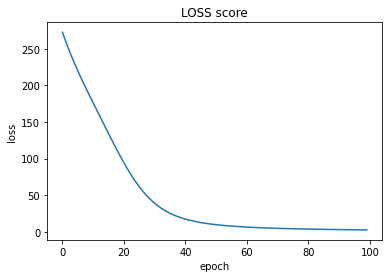

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("LOSS score")
sns.lineplot(list(range(100)), losses)

In [26]:
embeddings = nn.Embedding(vocab_size, 256)
context_idxs = torch.tensor([dictionary[w] for w in context_word[0]], dtype=torch.long)
embeds = embeddings(context_idxs).view((1, -1))
linear1 = nn.Linear(2*context_size * 256, 256)
linear2 = nn.Linear(256, vocab_size)

In [27]:
model.predict(context_word[0])

[('có', 4, tensor(-0.0339, grad_fn=<UnbindBackward0>))]


In [28]:
target[0]

'có'

In [29]:
# context_word[0]
target[0]

'có'